# **Bellabeat Case Study with R**
# *** FitBit Fitness Tracker Data***

### Elliot Manuel Sithole
### 14/7/2022
<br>


# Introduction
## Scenario 
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy
<br><br>

## About the company
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website. The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.

Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.
<br><br>

## Characters and teams
* **Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer

* **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

* **Bellabeat marketing analytics team**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been busy learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst, can help Bellabeat achieve them.

## Products
* **Bellabeat app**: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

* **Leaf**: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

* **Time**: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.

* **Spring**: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.

* **Bellabeat membership**: Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.
<br><br>

## Ask
  1. What are some trends in smart device usage?
  2. How could these trends apply to Bellabeat customers?
  3. How could these trends help influence Bellabeat marketing strategy?
<br><br>

## Key deliverables
  1. A clear summary of the business task
  2. A description of all data sources used
  3. Documentation of any cleaning or manipulation of data
  4. A summary of your analysis
  5. Supporting visualizations and key findings
  6. Your top high-level content recommendations based on your analysis

# Load R Environment

In [1]:
# Setting up my R environment
library(ggpubr)
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(lubridate)
library(ggrepel)
library(ggplot2)
library(reshape2)
library(scales)

Loading required package: ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




# Import Datasets

In [2]:
# Upload raw data
daily_activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep_day <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
heart_rate <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

# Inspect and Clean Dataframes

In [3]:
print("Daily Activity")
head(daily_activity)

print("Hourly Calories")
head(hourly_calories)

print("Hourly Intensities")
head(hourly_intensities)

print("Sleep Day")
head(sleep_day)

print("Weight Log")
head(weight_log)

print("Heart Rate")
head(heart_rate)

[1] "Daily Activity"


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


[1] "Hourly Calories"


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


[1] "Hourly Intensities"


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


[1] "Sleep Day"


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


[1] "Weight Log"


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


[1] "Heart Rate"


,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


In [4]:
# Mutate ActivtyHour data type to date / time and create new time, date, and month columns in df
hourly_intensities$ActivityHour=as.POSIXct(hourly_intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_intensities$time <- format(hourly_intensities$ActivityHour, format = "%H:%M:%S")
hourly_intensities$date <- format(hourly_intensities$ActivityHour, format = "%m/%d/%y")
hourly_intensities$month <- format(hourly_intensities$ActivityHour, format = "%B")

In [5]:
# Mutate ActivtyHour data type to date / time and create new time, date, and month columns in df
hourly_calories$ActivityHour=as.POSIXct(hourly_calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_calories$time <- format(hourly_calories$ActivityHour, format = "%H:%M:%S")
hourly_calories$date <- format(hourly_calories$ActivityHour, format = "%m/%d/%y")
hourly_calories$month <- format(hourly_calories$ActivityHour, format = "%B")

In [6]:
# Mutate ActivtyHour data type to date / time and create new time, date, month, and weekday columns in df
daily_activity$ActivityDate=as.POSIXct(daily_activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
daily_activity$date <- format(daily_activity$ActivityDate, format = "%m/%d/%y")
daily_activity$month <- format(daily_activity$ActivityDate, format = "%B")
daily_activity$day <- format(daily_activity$ActivityDate, format = "%d")
daily_activity$weekday <- format(daily_activity$ActivityDate, format = "%A")

In [7]:
# Mutate SleepDay data type to date / time and create new date and month columns in df
sleep_day$SleepDay=as.POSIXct(sleep_day$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep_day$date <- format(sleep_day$SleepDay, format = "%m/%d/%y")
sleep_day$month <- format(sleep_day$SleepDay, format = "%B")

In [8]:
# Mutate Date data type to date / time and create new time, date, and month columns in df
weight_log$Date=as.POSIXct(weight_log$Date, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
weight_log$date <- format(weight_log$Date, format = "%m/%d/%y")
weight_log$time <- format(weight_log$Date, format = "%H:%M:%S")
weight_log$month <- format(weight_log$Date, format = "%B")

In [9]:
# Mutate Time data type to date / time and create new time, date, and month columns in df
heart_rate$Time=as.POSIXct(heart_rate$Time, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
heart_rate$date <- format(heart_rate$Time, format = "%m/%d/%y")
heart_rate$time <- format(heart_rate$Time, format = "%H")
heart_rate$month <- format(heart_rate$Time, format = "%B")

In [10]:
print("Daily Activity")
head(daily_activity)

print("Hourly Calories")
head(hourly_calories)

print("Hourly Intensities")
head(hourly_intensities)

print("Sleep Day")
head(sleep_day)

print("Weight Log")
head(weight_log)

print("Heart Rate")
head(heart_rate)

[1] "Daily Activity"


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date,month,day,weekday
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16,April,12,Tuesday
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16,April,13,Wednesday
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16,April,14,Thursday
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16,April,15,Friday
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16,April,16,Saturday
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16,April,17,Sunday


[1] "Hourly Calories"


,Id,ActivityHour,Calories,time,date,month
,<dbl>,<dttm>,<int>,<chr>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,81,00:00:00,04/12/16,April
2,1503960366,2016-04-12 01:00:00,61,01:00:00,04/12/16,April
3,1503960366,2016-04-12 02:00:00,59,02:00:00,04/12/16,April
4,1503960366,2016-04-12 03:00:00,47,03:00:00,04/12/16,April
5,1503960366,2016-04-12 04:00:00,48,04:00:00,04/12/16,April
6,1503960366,2016-04-12 05:00:00,48,05:00:00,04/12/16,April


[1] "Hourly Intensities"


,Id,ActivityHour,TotalIntensity,AverageIntensity,time,date,month
,<dbl>,<dttm>,<int>,<dbl>,<chr>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00,04/12/16,April
2,1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00,04/12/16,April
3,1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00,04/12/16,April
4,1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00,04/12/16,April
5,1503960366,2016-04-12 04:00:00,0,0.000000,04:00:00,04/12/16,April
6,1503960366,2016-04-12 05:00:00,0,0.000000,05:00:00,04/12/16,April


[1] "Sleep Day"


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date,month
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>,<chr>
1,1503960366,2016-04-12,1,327,346,04/12/16,April
2,1503960366,2016-04-13,2,384,407,04/13/16,April
3,1503960366,2016-04-15,1,412,442,04/15/16,April
4,1503960366,2016-04-16,2,340,367,04/16/16,April
5,1503960366,2016-04-17,1,700,712,04/17/16,April
6,1503960366,2016-04-19,1,304,320,04/19/16,April


[1] "Weight Log"


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,date,time,month
,<dbl>,<dttm>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1503960366,2016-05-02 23:59:59,52.6,115.9631,22,22.65,True,1.462234e+12,05/02/16,23:59:59,May
2,1503960366,2016-05-03 23:59:59,52.6,115.9631,NA,22.65,True,1.462320e+12,05/03/16,23:59:59,May
3,1927972279,2016-04-13 01:08:52,133.5,294.3171,NA,47.54,False,1.460510e+12,04/13/16,01:08:52,April
4,2873212765,2016-04-21 23:59:59,56.7,125.0021,NA,21.45,True,1.461283e+12,04/21/16,23:59:59,April
5,2873212765,2016-05-12 23:59:59,57.3,126.3249,NA,21.69,True,1.463098e+12,05/12/16,23:59:59,May
6,4319703577,2016-04-17 23:59:59,72.4,159.6147,25,27.45,True,1.460938e+12,04/17/16,23:59:59,April


[1] "Heart Rate"


,Id,Time,Value,date,time,month
,<dbl>,<dttm>,<int>,<chr>,<chr>,<chr>
1,2022484408,2016-04-12 07:21:00,97,04/12/16,07,April
2,2022484408,2016-04-12 07:21:05,102,04/12/16,07,April
3,2022484408,2016-04-12 07:21:10,105,04/12/16,07,April
4,2022484408,2016-04-12 07:21:20,103,04/12/16,07,April
5,2022484408,2016-04-12 07:21:25,101,04/12/16,07,April
6,2022484408,2016-04-12 07:22:05,95,04/12/16,07,April


In [11]:
# Summary of weight in pounds and BMI
weight_log %>%  
  select(WeightPounds,
         BMI) %>%
  summary()

  WeightPounds        BMI       
 Min.   :116.0   Min.   :21.45  
 1st Qu.:135.4   1st Qu.:23.96  
 Median :137.8   Median :24.39  
 Mean   :158.8   Mean   :25.19  
 3rd Qu.:187.5   3rd Qu.:25.56  
 Max.   :294.3   Max.   :47.54  

In [12]:
# Summary of daily total minutes asleep and total time in bed (60 minutes = 1 hour)
sleep_day %>%  
  select(TotalMinutesAsleep,
         TotalTimeInBed) %>%
  summary()

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.0  
 Median :433.0      Median :463.0  
 Mean   :419.5      Mean   :458.6  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

In [13]:
# Summary of number of calories burned per hour
hourly_calories %>%  
  select(Calories) %>%
  summary()

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

In [14]:
# Summary of daily total steps, total distance walked, and number of sedentary minutes
daily_activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :1440.0  

In [15]:
# Summary of heart rate BPM
heart_rate %>%  
  select(Value) %>%
  summary()

     Value       
 Min.   : 36.00  
 1st Qu.: 63.00  
 Median : 73.00  
 Mean   : 77.33  
 3rd Qu.: 88.00  
 Max.   :203.00  

In [16]:
n_distinct(daily_activity$Id)
n_distinct(hourly_calories$Id)
n_distinct(hourly_intensities$Id)
n_distinct(sleep_day$Id)
n_distinct(weight_log$Id)
n_distinct(heart_rate$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

[1] 14

In [17]:
nrow(daily_activity)
nrow(hourly_calories)
nrow(hourly_intensities)
nrow(sleep_day)
nrow(weight_log)
nrow(heart_rate)

[1] 940

[1] 22099

[1] 22099

[1] 413

[1] 67

[1] 2483658

# Visualizations

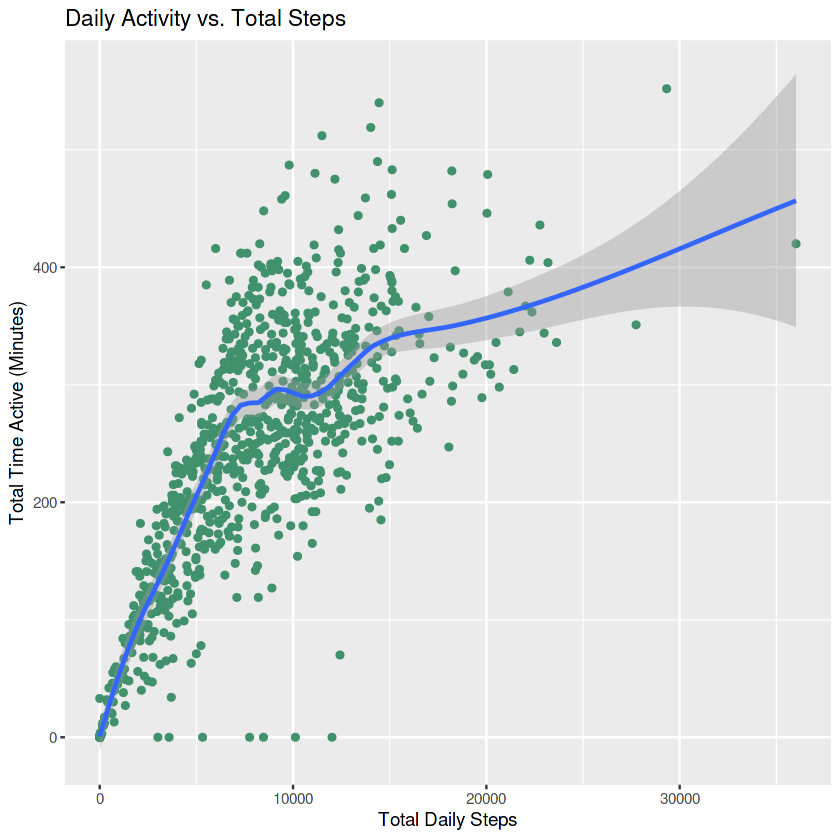

In [18]:
# Create new df with daily active minutes
daily_steps_activity <- daily_activity %>%
mutate(TotalActiveMinutes = VeryActiveMinutes+FairlyActiveMinutes+LightlyActiveMinutes)

# Plot relationship between number of daily steps and minutes active during the day
sctr_steps <- ggplot(data=daily_steps_activity, aes(x=TotalSteps, y=TotalActiveMinutes)) + 
geom_point(color="#40916c") + 
geom_smooth(method = 'loess', formula = y ~ x, span = 0.3) +
labs(title="Daily Activity vs. Total Steps", x="Total Daily Steps", y="Total Time Active (Minutes)")

sctr_steps

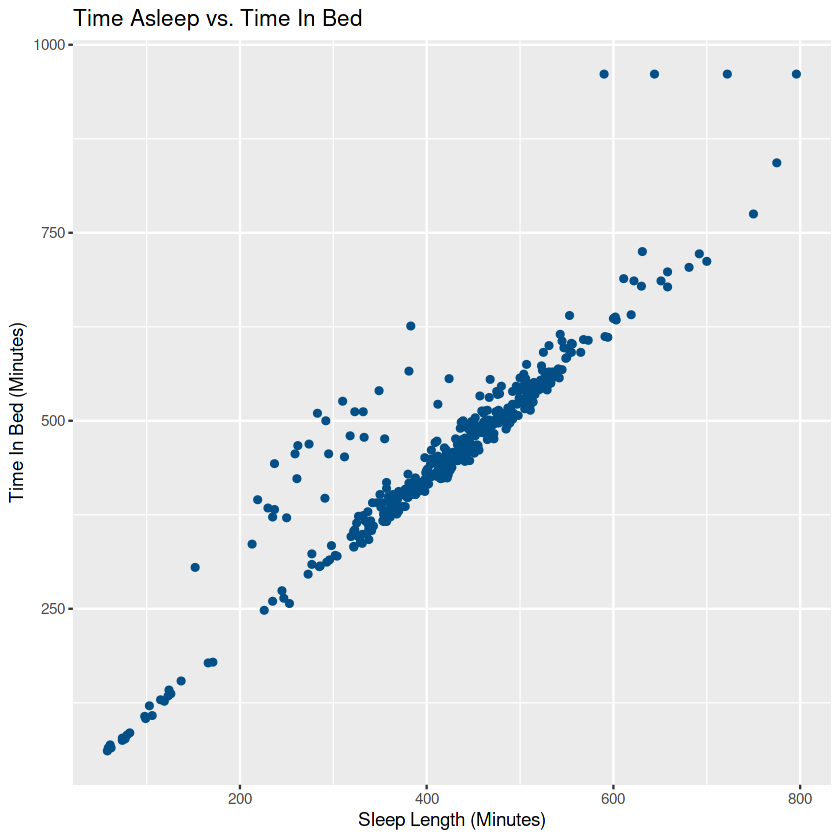

In [19]:
# Plot relationship between time in bed and sleep length
sctr_sleep <- ggplot(data=sleep_day, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
geom_point(color="#014f86") +
labs(title="Time Asleep vs. Time In Bed", x="Sleep Length (Minutes)", y="Time In Bed (Minutes)")

sctr_sleep

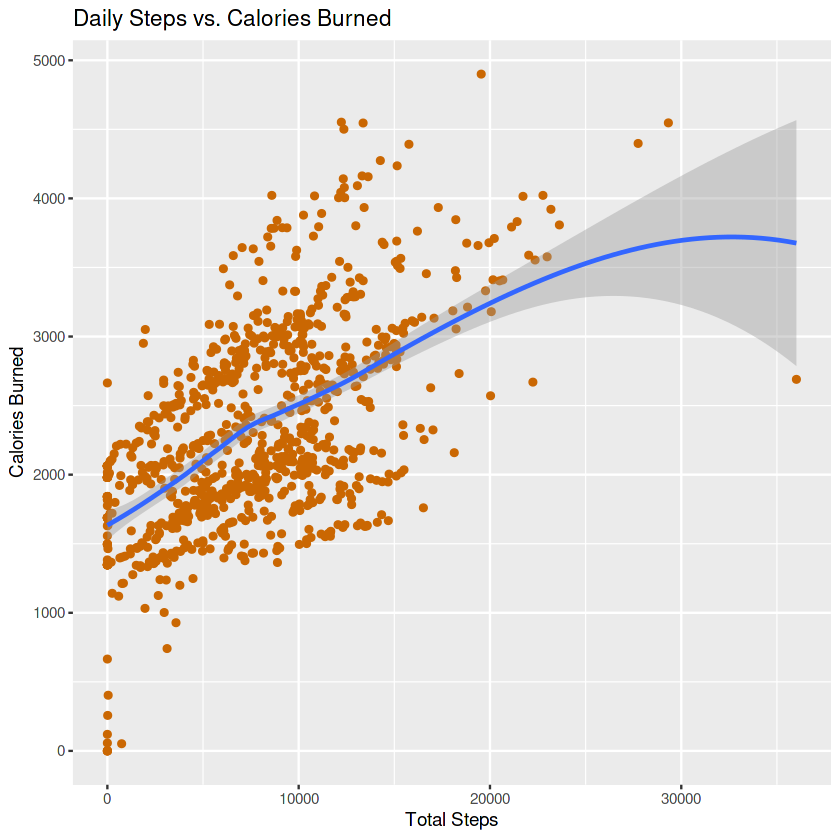

In [20]:
# Plot relationship between daily steps and calories burned
sctr_steps_calories <- ggplot(data=daily_activity, aes(x=TotalSteps, y=Calories)) + 
geom_point(color="#ca6702") + geom_smooth(method = 'loess', formula = y ~ x) + 
labs(title="Daily Steps vs. Calories Burned", x="Total Steps", y="Calories Burned")

sctr_steps_calories

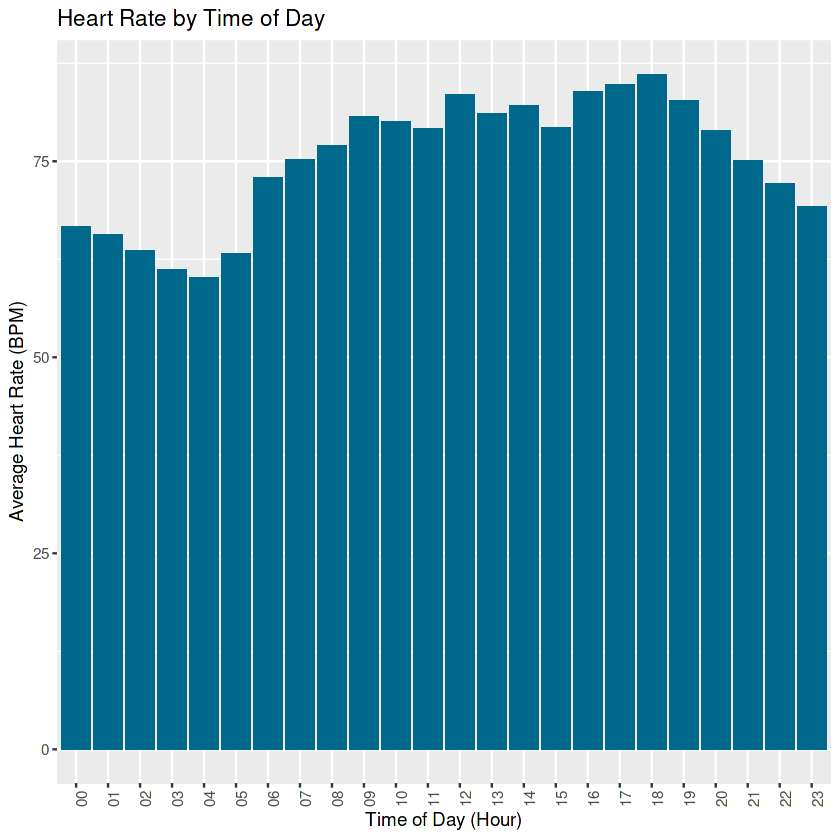

In [21]:
# Create new df with average heart rate, grouped by the time, and na values dropped
hourly_hr <- heart_rate %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_hr = mean(Value))

# Plot relationship between average heart rate and time of day
bar_heart_rate <- ggplot(data=hourly_hr, aes(x=time, y=mean_total_hr)) + 
geom_bar(stat = "identity", fill='deepskyblue4') +
theme(axis.text.x = element_text(angle = 90)) +
labs(title="Heart Rate by Time of Day", x="Time of Day (Hour)", y="Average Heart Rate (BPM)")

bar_heart_rate

In [22]:
# Merge daily activity and hourly intensities by id and date, and save as new df
d_activity_hr_intensities <- merge(daily_activity, hourly_intensities, by=c('Id', 'date'))
glimpse(d_activity_hr_intensities)

Rows: 22,099
Columns: 24
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <chr> "04/12/16", "04/12/16", "04/12/16", "04/12/16…
$ ActivityDate             <dttm> 2016-04-12, 2016-04-12, 2016-04-12, 2016-04-…
$ TotalSteps               <int> 13162, 13162, 13162, 13162, 13162, 13162, 131…
$ TotalDistance            <dbl> 8.50, 8.50, 8.50, 8.50, 8.50, 8.50, 8.50, 8.5…
$ TrackerDistance          <dbl> 8.50, 8.50, 8.50, 8.50, 8.50, 8.50, 8.50, 8.5…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.88, 1.88, 1.88, 1.88, 1.88, 1.88, 1.8…
$ ModeratelyActiveDistance <dbl> 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.5…
$ LightActiveDistance      <dbl> 6.06, 6.06, 6.06, 6.06, 6.06, 6.06, 6.06, 6.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 2…
$ FairlyActiveM

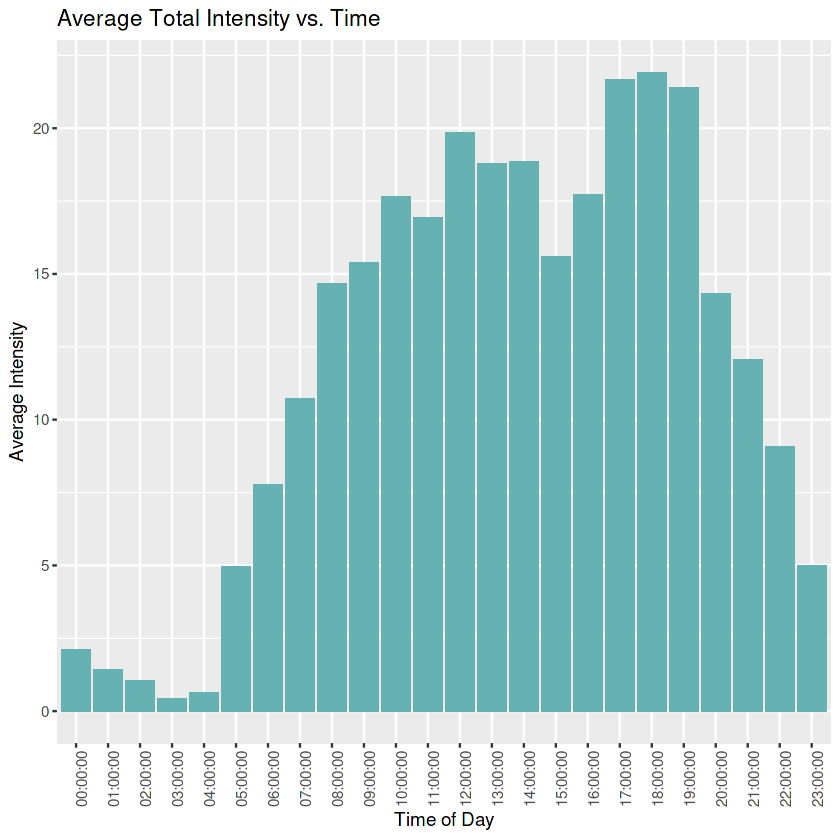

In [23]:
# Create new df with average intensity, grouped by the time, and na values dropped
hourly_intensity <- d_activity_hr_intensities %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))

# Plot relationship between average intensity and time of day
bar_intensity <- ggplot(data=hourly_intensity, aes(x=time, y=mean_total_int)) + 
geom_bar(stat = "identity", fill='#66b2b2') +
theme(axis.text.x = element_text(angle = 90)) +
labs(title="Average Total Intensity vs. Time", y="Average Intensity", x="Time of Day")

bar_intensity

In [24]:
# Merge daily activity and sleep duration by id and date, and save as new df
d_activity_d_sleep <- merge(daily_activity, sleep_day, by=c ("Id", "date"))
d_activity_d_sleep <- d_activity_d_sleep %>% select(-c("month.y"))
glimpse(d_activity_d_sleep)

Rows: 413
Columns: 23
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <chr> "04/12/16", "04/13/16", "04/15/16", "04/16/16…
$ ActivityDate             <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ TotalSteps               <int> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ TotalDistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ FairlyActiveMinu

In [25]:
# Create new df with average hours asleep, average hours in bed, average calories burned, grouped by the time, and na values dropped
avg_by_day <- d_activity_d_sleep %>%
  group_by(Id) %>%
  summarise (mean_hrs_asleep = mean(TotalMinutesAsleep)/60, 
             mean_hrs_in_bed = mean(TotalTimeInBed)/60, 
             mean_daily_calories = mean(Calories))

In [26]:
head(avg_by_day)

Id,mean_hrs_asleep,mean_hrs_in_bed,mean_daily_calories
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,6.004667,6.386667,1872.280
1644430081,4.900000,5.766667,2977.750
1844505072,10.866667,16.016667,1676.333
1927972279,6.950000,7.296667,2316.200
2026352035,8.436310,8.960714,1540.786
2320127002,1.016667,1.150000,1804.000


In [27]:
# Create new df and classify sleeper type by hours asleep
sleeper_type_table <- avg_by_day %>%
  mutate(sleeper_type = case_when(
    mean_hrs_asleep < 4 ~ "Unhealthy Sleeper",
    mean_hrs_asleep >= 4 & mean_hrs_asleep < 6 ~ "Bad Sleeper", 
    mean_hrs_asleep >= 6 & mean_hrs_asleep < 7 ~ "Normal Sleeper", 
    mean_hrs_asleep >= 7 ~ "Good Sleeper"
  ))

In [28]:
head(sleeper_type_table)

Id,mean_hrs_asleep,mean_hrs_in_bed,mean_daily_calories,sleeper_type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,6.004667,6.386667,1872.280,Normal Sleeper
1644430081,4.900000,5.766667,2977.750,Bad Sleeper
1844505072,10.866667,16.016667,1676.333,Good Sleeper
1927972279,6.950000,7.296667,2316.200,Normal Sleeper
2026352035,8.436310,8.960714,1540.786,Good Sleeper
2320127002,1.016667,1.150000,1804.000,Unhealthy Sleeper


sleeper_type,total_percent
<fct>,<chr>
Bad Sleeper,21%
Good Sleeper,50%
Normal Sleeper,17%
Unhealthy Sleeper,12%


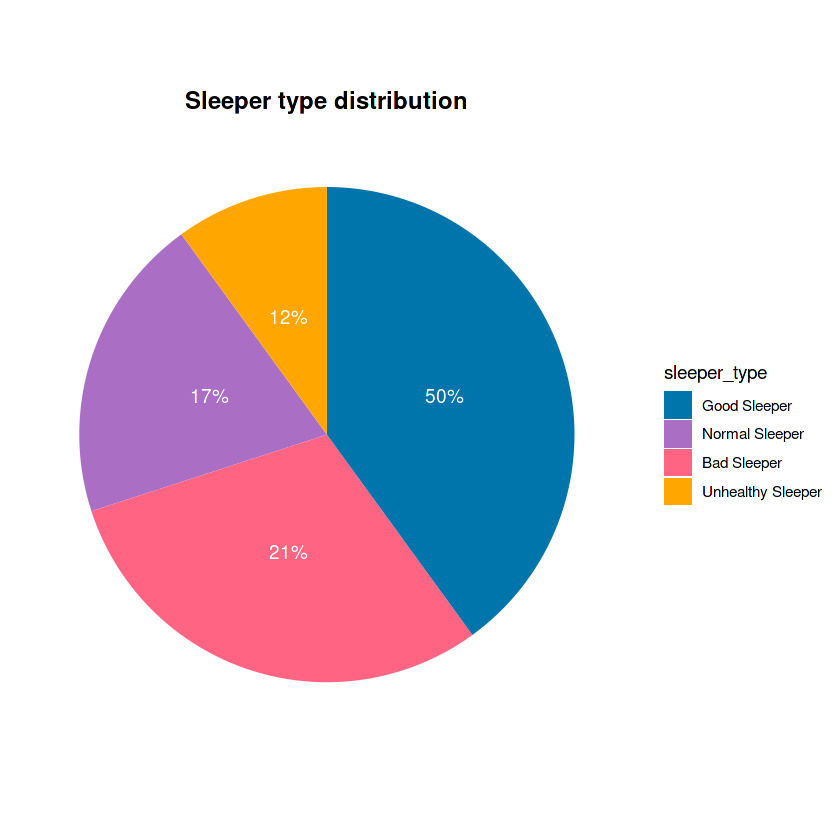

In [29]:
# Create new df with percentage of each type of sleeper
pct_sleeper_type <- sleeper_type_table %>%
  group_by(sleeper_type) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(sleeper_type) %>%
  summarise(total_percent = scales::percent(total / totals))

# Create vector for each type of sleeper
pct_sleeper_type$sleeper_type <- factor(pct_sleeper_type$sleeper_type , levels = c("Good Sleeper", "Normal Sleeper", "Bad Sleeper", "Unhealthy Sleeper"))

# Plot donut chart of percentage distribution of sleeper type
donut_pst <- pct_sleeper_type %>%
  ggplot(aes(x="",y=total_percent, fill=sleeper_type)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#0075ab","#aa6fc5","#ff6583","#ffa600"),
                   labels = c("Good Sleeper", "Normal Sleeper", "Bad Sleeper", "Unhealthy Sleeper")) +
  geom_text(aes(label = total_percent), color="white",
            position = position_stack(vjust = 0.5))+
  labs(title="Sleeper type distribution")

head(pct_sleeper_type)
donut_pst

In [30]:
# Create new df with the weekday name from the activity date
weekday_steps_sleep <- d_activity_d_sleep %>%
  mutate(weekday = weekdays(ActivityDate))

# Create vector for the weekdays
weekday_steps_sleep$weekday <-ordered(weekday_steps_sleep$weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
"Friday", "Saturday", "Sunday"))

# Create new df with summary of average steps, average hours asleep, and grouped by the weekday
 weekday_steps_sleep <- weekday_steps_sleep%>%
  group_by(weekday) %>%
  summarize(daily_steps = mean(TotalSteps), daily_sleep = mean(TotalMinutesAsleep)/60)

head(weekday_steps_sleep)

weekday,daily_steps,daily_sleep
<ord>,<dbl>,<dbl>
Monday,9339.851,6.980496
Tuesday,9182.692,6.742308
Wednesday,8022.864,7.244697
Thursday,8205.354,6.706154
Friday,7901.404,6.757018
Saturday,9948.690,7.013506


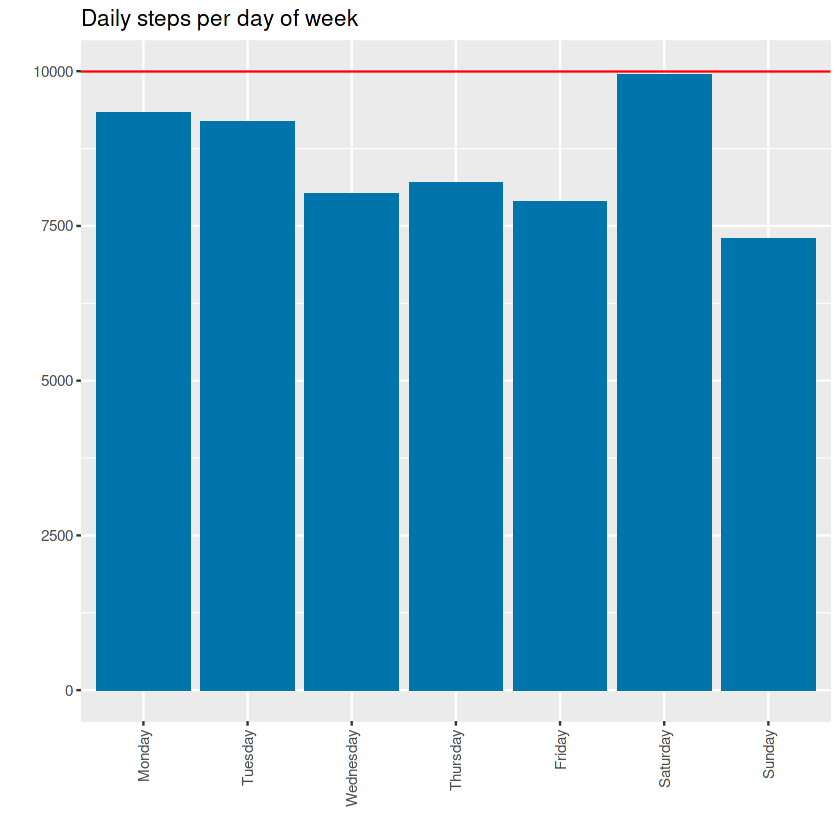

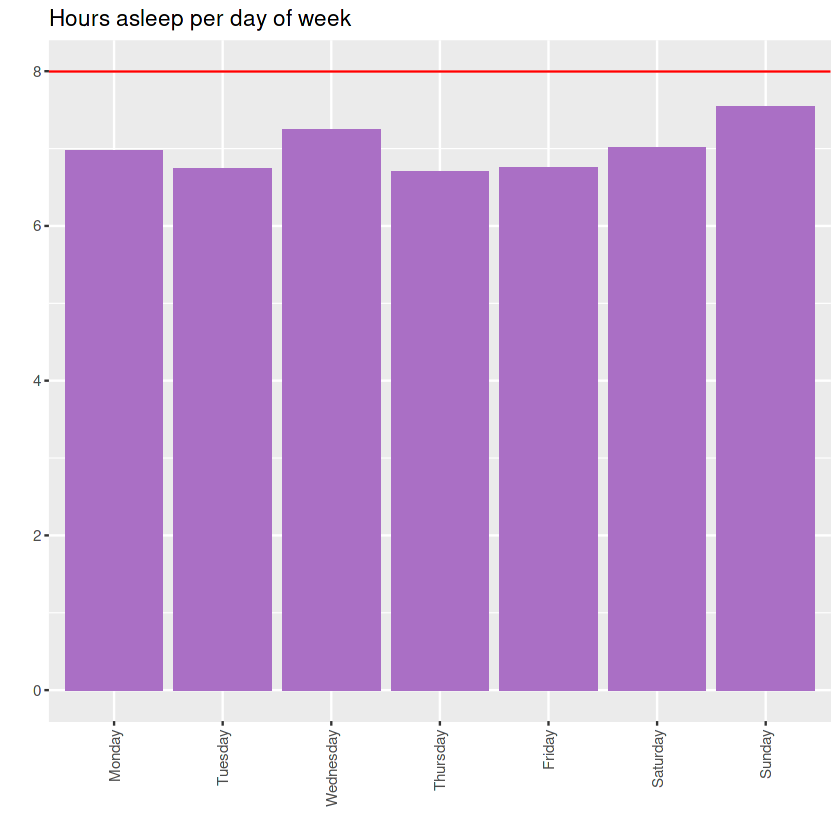

In [31]:
# Plot relationship between number of steps for each day of the week with horizontal line representing the national average number of steps a day
column_steps_weekday <- ggplot(weekday_steps_sleep) +
    geom_col(aes(weekday, daily_steps), fill = "#0075ab") +
    geom_hline(yintercept = 10000, color="red") +
    labs(title = "Daily steps per day of week", x= "", y = "") +
    theme(axis.text.x = element_text(angle = 90,vjust = 0.5, hjust = 1))

# Plot relationship between hours of sleep for each day of the week with horizontal line representing the recommended number hours of sleep a day
column_sleep_weekday <- ggplot(weekday_steps_sleep, aes(weekday, daily_sleep)) +
    geom_col(fill = "#aa6fc5") +
    geom_hline(yintercept = 8, color="red") +
    labs(title = "Hours asleep per day of week", x= "", y = "") +
    theme(axis.text.x = element_text(angle = 90,vjust = 0.5, hjust = 1))

column_steps_weekday
column_sleep_weekday

In [32]:
# Merge daily activity and weight log by id and date, and save as new df
weight_bmi <- merge(daily_activity, weight_log, by=c('Id', 'date'))
weight_bmi <- weight_bmi %>% select(-c("IsManualReport","LogId","WeightKg","month.y"))
glimpse(weight_bmi)

Rows: 67
Columns: 24
$ Id                       <dbl> 1503960366, 1503960366, 1927972279, 287321276…
$ date                     <chr> "05/02/16", "05/03/16", "04/13/16", "04/21/16…
$ ActivityDate             <dttm> 2016-05-02, 2016-05-03, 2016-04-13, 2016-04-…
$ TotalSteps               <int> 14727, 15103, 356, 8859, 7566, 29, 10429, 894…
$ TotalDistance            <dbl> 9.71, 9.66, 0.25, 5.98, 5.11, 0.02, 7.02, 5.9…
$ TrackerDistance          <dbl> 9.71, 9.66, 0.25, 5.98, 5.11, 0.02, 7.02, 5.9…
$ LoggedActivitiesDistance <dbl> 0.000000, 0.000000, 0.000000, 0.000000, 0.000…
$ VeryActiveDistance       <dbl> 3.21, 3.73, 0.00, 0.13, 0.00, 0.00, 0.59, 0.9…
$ ModeratelyActiveDistance <dbl> 0.57, 1.05, 0.00, 0.37, 0.00, 0.00, 0.58, 0.9…
$ LightActiveDistance      <dbl> 5.92, 4.88, 0.25, 5.47, 5.11, 0.02, 5.85, 4.0…
$ SedentaryActiveDistance  <dbl> 0.00, 0.00, 0.00, 0.01, 0.00, 0.00, 0.00, 0.0…
$ VeryActiveMinutes        <int> 41, 50, 0, 2, 0, 0, 8, 14, 18, 0, 0, 6, 200, …
$ FairlyActiveMinut

In [33]:
# Create new df with average weight in pounds, average BMI, grouped by id, and na values dropped
avg_weight_bmi <- weight_bmi %>%
  group_by(Id) %>%
  summarise (mean_weight = mean(WeightPounds), 
             mean_bmi = mean(BMI))

head(avg_weight_bmi)
max(weight_bmi$BMI)
min(weight_bmi$BMI)

Id,mean_weight,mean_bmi
<dbl>,<dbl>,<dbl>
1503960366,115.9631,22.650
1927972279,294.3171,47.540
2873212765,125.6635,21.570
4319703577,159.5045,27.415
4558609924,153.5299,27.214
5577150313,199.9593,28.000


[1] 47.54

[1] 21.45

In [34]:
# Create new df and classify weight type by BMI
bmi_health_table <- avg_weight_bmi %>%
mutate(bmi_health = case_when(
    mean_bmi < 18.5 ~ "Underweight",
    mean_bmi >= 18.5 & mean_bmi < 24.9 ~ "Normal Weight", 
    mean_bmi >= 25 & mean_bmi < 29.9 ~ "Overweight", 
    mean_bmi >= 30 ~ "Obease"
  ))

head(bmi_health_table)

Id,mean_weight,mean_bmi,bmi_health
<dbl>,<dbl>,<dbl>,<chr>
1503960366,115.9631,22.650,Normal Weight
1927972279,294.3171,47.540,Obease
2873212765,125.6635,21.570,Normal Weight
4319703577,159.5045,27.415,Overweight
4558609924,153.5299,27.214,Overweight
5577150313,199.9593,28.000,Overweight


bmi_health,total_percent
<fct>,<chr>
Normal Weight,38%
Obease,12%
Overweight,50%


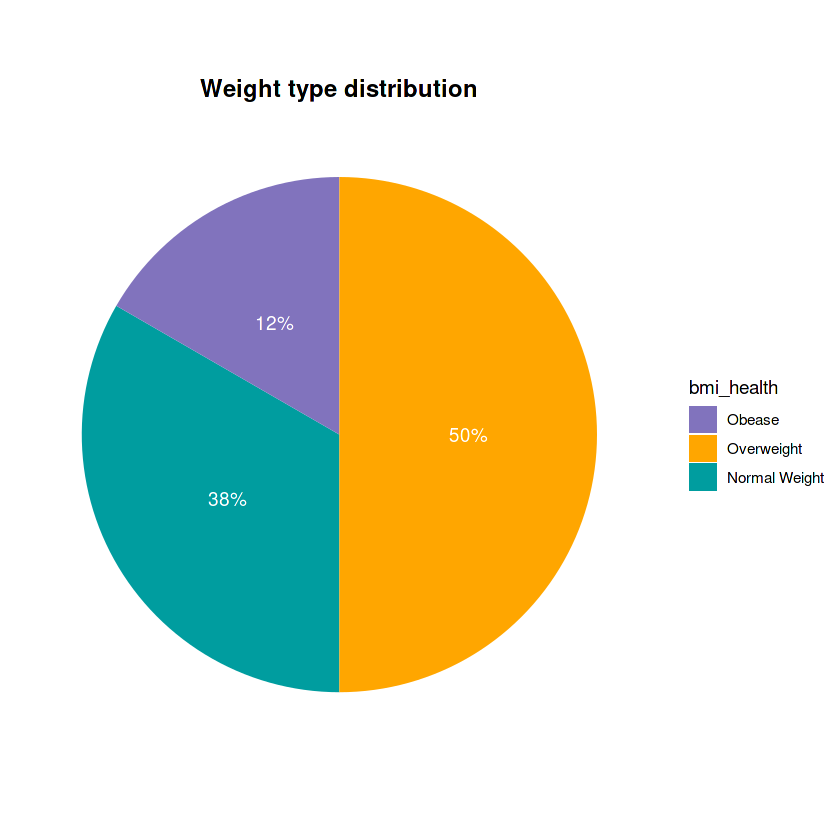

In [35]:
# Create new df with percentage of each type of weight type
pct_bmi_health <- bmi_health_table %>%
  group_by(bmi_health) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(bmi_health) %>%
  summarise(total_percent = scales::percent(total / totals))

# Create vector for each weight type
pct_bmi_health$bmi_health <- factor(pct_bmi_health$bmi_health , levels = c("Obease", "Overweight", "Normal Weight", "Underweight"))

# Plot donut chart of percentage distribution of weight type
donut_pbh <- pct_bmi_health %>%
  ggplot(aes(x="",y=total_percent, fill=bmi_health)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#8173bd","#ffa600","#009d9f"),
                   labels = c("Obease", "Overweight", "Normal Weight", "Underweight")) +
  geom_text(aes(label = total_percent),color="white",
            position = position_stack(vjust = 0.5))+
  labs(title="Weight type distribution")

head(pct_bmi_health)
donut_pbh

In [36]:
# Create new df and classify wearable tracker user type
daily_tracker_use_table <- d_activity_d_sleep %>%
  group_by(Id) %>%
  summarize(days_used=sum(n())) %>%
  mutate(tracker_usage = case_when(
    days_used < 11 ~ "Light Use",
    days_used >= 11 & days_used <= 20 ~ "Moderate Use", 
    days_used >= 21 & days_used <= 31 ~ "High Use", 
  )) %>%
drop_na()
  
head(daily_tracker_use_table)

Id,days_used,tracker_usage
<dbl>,<int>,<chr>
1503960366,25,High Use
1644430081,4,Light Use
1844505072,3,Light Use
1927972279,5,Light Use
2026352035,28,High Use
2320127002,1,Light Use


tracker_usage,total_percent
<fct>,<chr>
High Use,48%
Light Use,39%
Moderate Use,13%


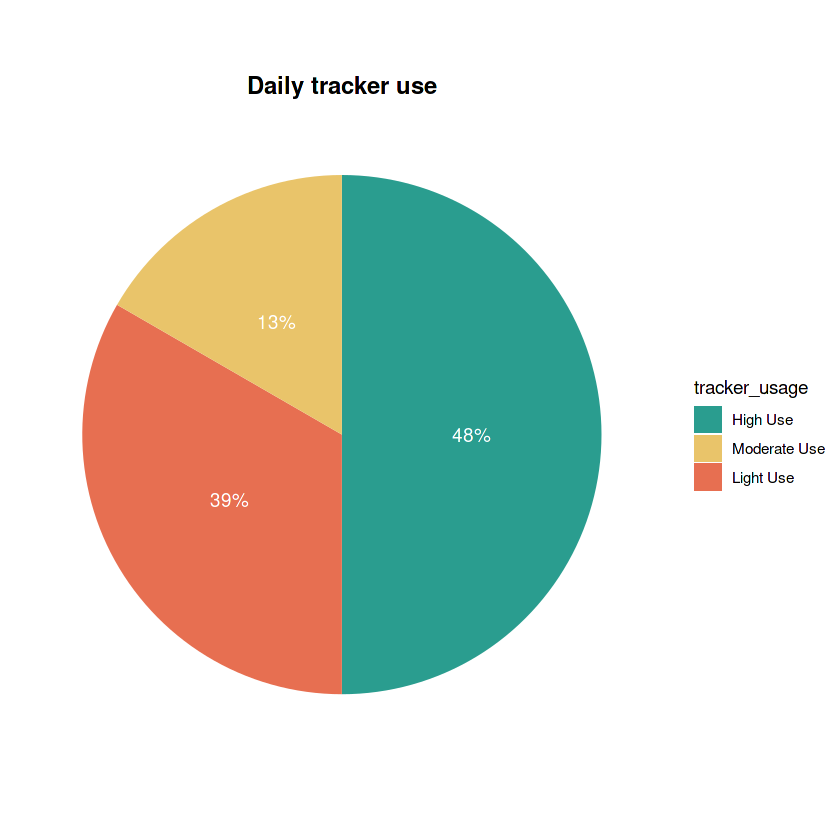

In [37]:
# Create new df with percentage of wearable tracker usage
pct_daily_tracker_use <- daily_tracker_use_table %>%
  group_by(tracker_usage) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(tracker_usage) %>%
  summarise(total_percent = scales::percent(total / totals))

# Create vector for each wearable tracker user type
pct_daily_tracker_use$tracker_usage <- factor(pct_daily_tracker_use$tracker_usage , levels = c("High Use", "Moderate Use", "Light Use"))

# Plot donut chart of percentage distribution of wearable tracker user type
donut_pdtu <- pct_daily_tracker_use %>%
  ggplot(aes(x="",y=total_percent, fill=tracker_usage)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#2a9d8f","#e9c46a","#e76f51"),
                   labels = c("High Use", "Moderate Use", "Light Use")) +
  geom_text(aes(label = total_percent),color="white",
            position = position_stack(vjust = 0.5))+
  labs(title="Daily tracker use")

head(pct_daily_tracker_use)
donut_pdtu

In [38]:
# Merge daily activity and tracker use by id, and save as new df
daily_use_merged <- merge(daily_activity, daily_tracker_use_table, by=c ("Id"))
head(daily_use_merged)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date,month,day,weekday,days_used,tracker_usage
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,1503960366,2016-04-30,14673,9.25,9.25,0,3.56,1.42,4.27,0,⋯,34,217,712,1947,04/30/16,April,30,Saturday,25,High Use
2,1503960366,2016-05-01,10602,6.81,6.81,0,2.29,1.60,2.92,0,⋯,35,246,730,1820,05/01/16,May,01,Sunday,25,High Use
3,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,⋯,46,175,833,1821,05/07/16,May,07,Saturday,25,High Use
4,1503960366,2016-04-25,15355,9.80,9.80,0,5.29,0.57,3.94,0,⋯,14,216,814,2013,04/25/16,April,25,Monday,25,High Use
5,1503960366,2016-04-28,13154,8.53,8.53,0,3.54,1.16,3.79,0,⋯,28,189,782,1898,04/28/16,April,28,Thursday,25,High Use
6,1503960366,2016-04-29,11181,7.15,7.15,0,1.06,0.50,5.58,0,⋯,12,243,815,1837,04/29/16,April,29,Friday,25,High Use


In [39]:
# Create new df and classify length of use for wearable tracker
minutes_worn <- daily_use_merged %>% 
  mutate(total_minutes_worn = VeryActiveMinutes+FairlyActiveMinutes+LightlyActiveMinutes+SedentaryMinutes) %>%
  mutate (percent_minutes_worn = (total_minutes_worn/1440)*100) %>%
  mutate (worn = case_when(
    percent_minutes_worn == 100 ~ "All Day",
    percent_minutes_worn < 100 & percent_minutes_worn >= 50~ "More than half day", 
    percent_minutes_worn < 50 & percent_minutes_worn > 0 ~ "Less than half day"
  ))

head(minutes_worn)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,Calories,date,month,day,weekday,days_used,tracker_usage,total_minutes_worn,percent_minutes_worn,worn
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>
1,1503960366,2016-04-30,14673,9.25,9.25,0,3.56,1.42,4.27,0,⋯,1947,04/30/16,April,30,Saturday,25,High Use,1015,70.48611,More than half day
2,1503960366,2016-05-01,10602,6.81,6.81,0,2.29,1.60,2.92,0,⋯,1820,05/01/16,May,01,Sunday,25,High Use,1044,72.50000,More than half day
3,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,⋯,1821,05/07/16,May,07,Saturday,25,High Use,1091,75.76389,More than half day
4,1503960366,2016-04-25,15355,9.80,9.80,0,5.29,0.57,3.94,0,⋯,2013,04/25/16,April,25,Monday,25,High Use,1117,77.56944,More than half day
5,1503960366,2016-04-28,13154,8.53,8.53,0,3.54,1.16,3.79,0,⋯,1898,04/28/16,April,28,Thursday,25,High Use,1047,72.70833,More than half day
6,1503960366,2016-04-29,11181,7.15,7.15,0,1.06,0.50,5.58,0,⋯,1837,04/29/16,April,29,Friday,25,High Use,1086,75.41667,More than half day


In [40]:
# Create new df with percentage of wearable tracker usage by minutes
minutes_worn_pct <- minutes_worn %>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = scales::percent(total / totals))

# Create new df with percentage of high usage of the wearable tracker
minutes_worn_high_use <- minutes_worn %>%
  filter (tracker_usage == "High Use")%>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = scales::percent(total / totals))

# Create new df with percentage of moderate usage of the wearable tracker
minutes_worn_moderate_use <- minutes_worn %>%
  filter(tracker_usage == "Moderate Use") %>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = scales::percent(total / totals))

# Create new df with percentage of low usage of the wearable tracker
minutes_worn_light_use <- minutes_worn %>%
  filter (tracker_usage == "Light Use") %>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = scales::percent(total / totals))

# Create vectors for each wearable tracker usage lengths
minutes_worn_high_use$worn <- factor(minutes_worn_high_use$worn, levels = c("All Day", "More than half day", "Less than half day"))
minutes_worn_pct$worn <- factor(minutes_worn_pct$worn, levels = c("All Day", "More than half day", "Less than half day"))
minutes_worn_moderate_use$worn <- factor(minutes_worn_moderate_use$worn, levels = c("All Day", "More than half day", "Less than half day"))
minutes_worn_light_use$worn <- factor(minutes_worn_light_use$worn, levels = c("All Day", "More than half day", "Less than half day"))

In [41]:
head(minutes_worn_pct)

worn,total_percent
<fct>,<chr>
All Day,38%
Less than half day,3%
More than half day,59%


In [42]:
print("High User")
head(minutes_worn_high_use)

[1] "High User"


worn,total_percent
<fct>,<chr>
All Day,7%
Less than half day,4%
More than half day,88%


In [43]:
print("Moderate User")
head(minutes_worn_moderate_use)

[1] "Moderate User"


worn,total_percent
<fct>,<chr>
All Day,27%
Less than half day,4%
More than half day,69%


In [44]:
print("Light User")
head(minutes_worn_light_use)

[1] "Light User"


worn,total_percent
<fct>,<chr>
All Day,80%
Less than half day,2%
More than half day,18%


# Health and Wearable Trends

* The wearable usage data indicates that there is an inverse coorelation between how many days the tracker is worn during the month and the length of time worn each day --
  * 7% of high users (wearing tracker for at least 21 days a month) wear the tracker all day
  * 27% of moderate users (wearing tracker between 11 and 20 days) wear the tracker all day
  * 80% light users (wearing tracker for less than 11 days) wear the tracker all day


* Users are not sleeping the recommended 8 hours a day, with the least amount of sleep occuring on Thursdays

* Users are not walking the recommended 10,000 daily steps, with users walking the least amount of steps on Fridays

* Only 38% of users are at a healthy weight and BMI, indicating that more daily activity is needed for the remaining 62% of users

# Recommendations

* Invest in additional data capture techniques as current datasets provide a small sample size and do not include any demographic details

* Integrate notifications, gamification, and/or competitions into the wearables --
  * **Notifications** - Provide notifications within the wearable or app of the user's daily progress towards steps goal or weekly sleep goal. Notifications could also be sent an hour before the user's desired time to go to bed to help them prepare for sleep.

  * **Gamification** - While some users are not motivated by notifications, there could be some who respond better to rewards, wherein a user receives points if they meet or exceed the recommended daily steps, hours of sleep, etc. Once enough points are accumulated the user can redeem for free merchandise or a set percentage discount on a future purchase of a wearable.

  * **Competitions** - Create regional leaderboard with each user's weekly/monthly number of steps ranked against other users. At the end of each term, the top 3 users are awarded merchandise or discount codes for a future wearable purchase.

* Partner with health technology companies for integration of their products with Bellabeat wearables. Partnerships could include scales for weight tracking, insulin pumps for blood sugar tracking, or water bottles for water intake tracking.

* Incorporate a referal program where current wearable users can receive incremental discounts on merchandise or future wearable purchases based on the how many of their referrals who purchase a wearable.